In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load Dataset 
df = pd.read_csv("googleplaystore.csv")

# Show first few rows
print("Initial Data Sample:")

Initial Data Sample:


In [44]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
# Dataset shape and column types
print("\nShape:", df.shape)
print("\nColumns:\n", df.dtypes)


Shape: (10841, 13)

Columns:
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [46]:
# Drop Duplicates

df.drop_duplicates(inplace=True)

In [47]:
# Remove Rows with Invalid Ratings (>5 or <1)

df = df[(df['Rating'] <= 5) & (df['Rating'] >= 1)]

In [48]:
# Handle Missing Values

# See how many nulls exist
df.isnull().sum()

# Drop rows where essential fields are missing
df = df.dropna(subset=['Rating', 'Reviews', 'Installs', 'Category', 'App'])

In [49]:
# Clean the ‘Reviews’ Column (Convert to Numeric)

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')


In [50]:
# Clean the ‘Size’ Column

# Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Convert sizes to MB
def convert_size(size):
    if pd.isna(size):
        return np.nan
    size = size.replace('M', '').replace(',', '')
    if 'k' in size:
        return float(size.replace('k', '')) / 1024
    return float(size)

df['Size_MB'] = df['Size'].apply(convert_size)

In [51]:
# Clean the ‘Installs’ Column

# Remove commas and plus signs, convert to numeric
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

In [52]:
# Clean the ‘Price’ Column

# Remove the $ sign
df['Price'] = df['Price'].str.replace('$', '', regex=False)

# Convert to numeric, forcing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [53]:
# Standardize Column Types

df['Category'] = df['Category'].astype('category')
df['Type'] = df['Type'].astype('category')

In [54]:
# Drop or Fix Malformed Rows

df = df[df['App'].notnull()]
df[df['Category'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB


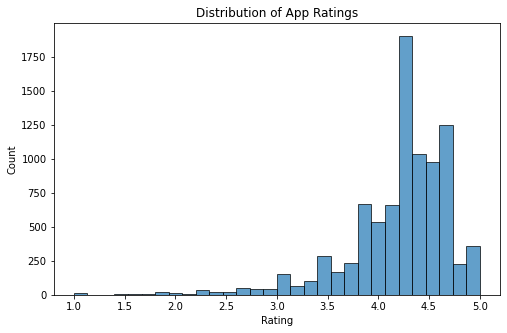

In [55]:
# Distribution of Ratings
plt.figure(figsize=(8,5))
plt.hist(df['Rating'].dropna(), bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


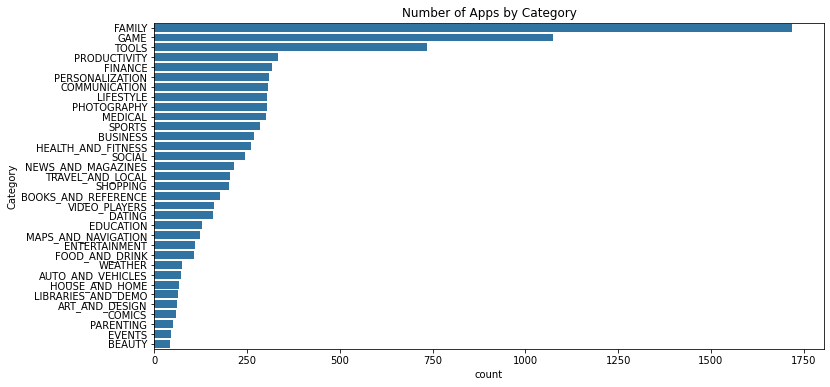

In [56]:
# Number of apps by Category
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Number of Apps by Category')
plt.show()


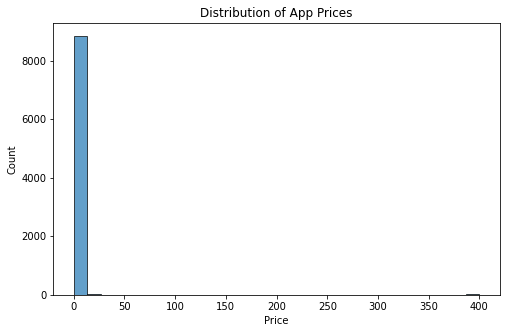

In [57]:
# Price distribution
plt.figure(figsize=(8,5))
plt.hist(df['Price'].dropna(), bins=30, alpha=0.7, edgecolor='black')
plt.title('Distribution of App Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()


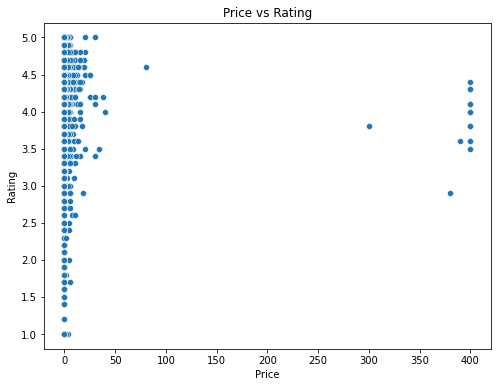

In [58]:
# Scatter plot: Price vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Price', y='Rating')
plt.title('Price vs Rating')
plt.show()


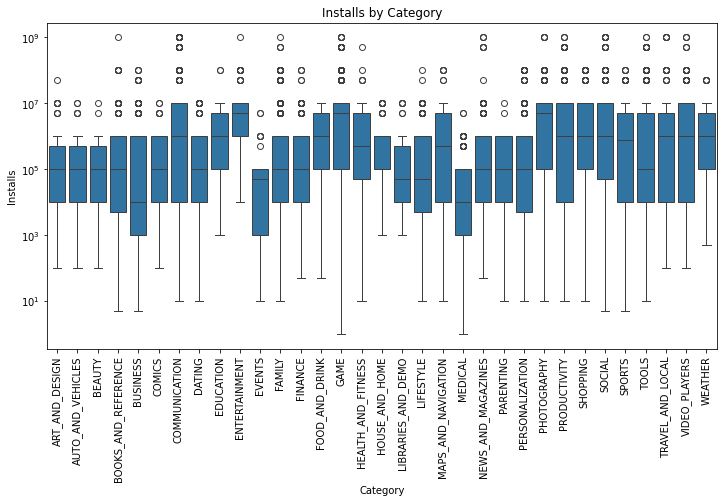

In [59]:
# Boxplot: Installs by Category (log scale if needed)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Category', y='Installs')
plt.xticks(rotation=90)
plt.title('Installs by Category')
plt.yscale('log')
plt.show()


In [60]:
from datetime import datetime

# 1. App Age (Years since last updated)
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['App_Age_Years'] = (datetime.now() - df['Last Updated']).dt.days // 365



In [61]:
# 2. Install Buckets
install_bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, df['Installs'].max()]
install_labels = ['<1K', '1K–10K', '10K–100K', '100K–1M', '1M–10M', '10M–100M', '100M+']
df['Install_Bucket'] = pd.cut(df['Installs'], bins=install_bins, labels=install_labels)



In [62]:
# 3. Price Type (Free vs Paid)
df['Price_Type'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')



In [63]:
# 4. Month/Weekday of Last Update
df['Update_Month'] = df['Last Updated'].dt.month_name()
df['Update_Weekday'] = df['Last Updated'].dt.day_name()

In [64]:
#Final Column Selection 

#final_df = df[['App', 'Category', 'Rating', 'Reviews', 'Size_MB', 'Installs', 'Type', 'Price']]

final_cols = [
    'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Install_Bucket',
    'Price', 'Price_Type', 'Content Rating', 'Genres', 'Last Updated',
    'App_Age_Years', 'Update_Month', 'Update_Weekday'
]
final_df = df[final_cols]

In [65]:
# Export cleaned dataset 

final_df.to_csv('cleaned_googleplaystore.csv', index=False)